In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
# from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [6]:
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')

# Split data the X - Our data , and y - the prdict label
X = data.drop('0',axis = 1)
y = data['0']


# Reshaping the data in csv file so that it can be displayed as an image...

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))


print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [7]:
# Dictionary for getting characters from index values...
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

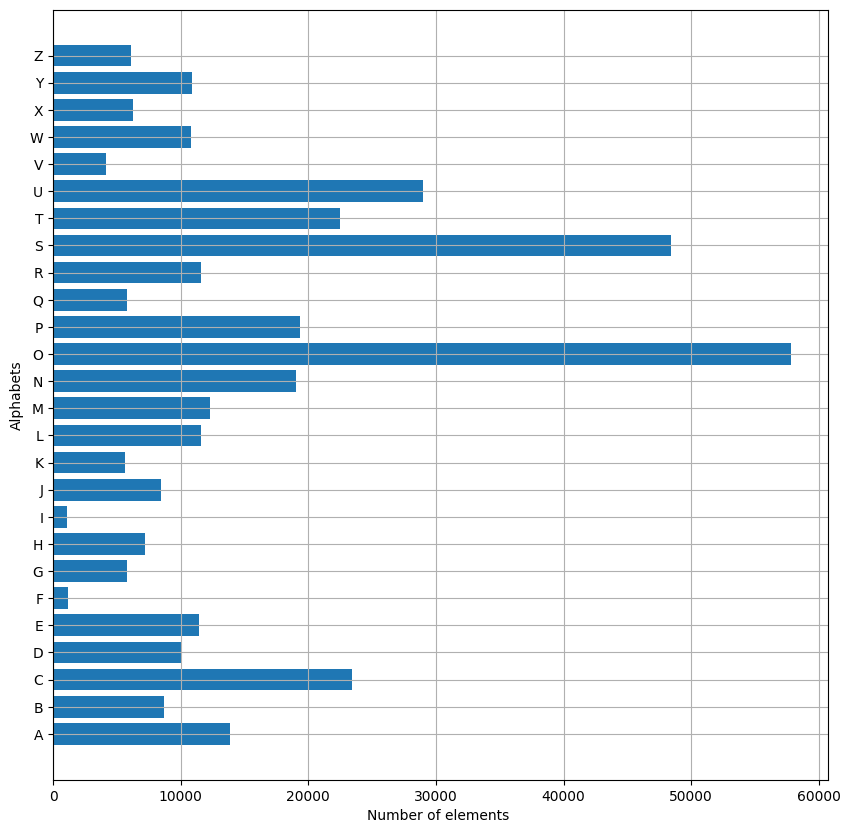

In [8]:
# Plotting the number of alphabets in the dataset...

train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

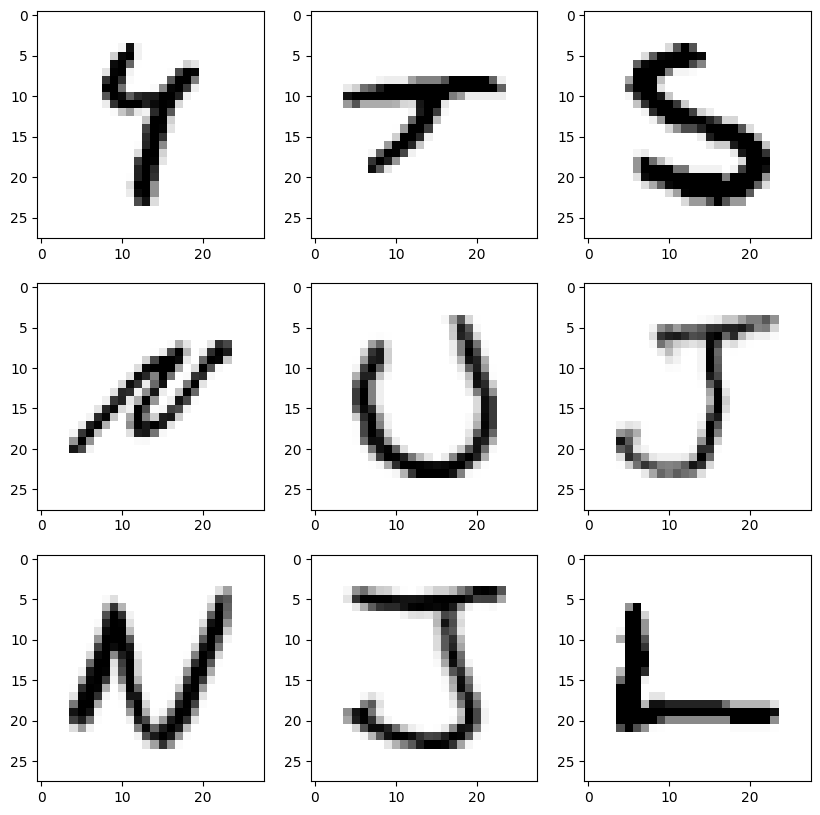

In [9]:
#Shuffling the data ...
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [10]:
#Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [11]:
# Converting the labels to categorical values...

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [12]:
# CNN model...

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))



model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

# 5 Epochs finalized after hit n trial method
history = model.fit(train_X, train_yOHE, epochs=5, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))


model.summary()
model.save(r'model_hand.h5')

Epoch 1/5
9312/9312 [==============================] - 112s 12ms/step - loss: 0.1600 - accuracy: 0.9568 - val_loss: 0.0779 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 2/5
9312/9312 [==============================] - 122s 13ms/step - loss: 0.0705 - accuracy: 0.9804 - val_loss: 0.0651 - val_accuracy: 0.9822 - lr: 0.0010
Epoch 3/5
9312/9312 [==============================] - 122s 13ms/step - loss: 0.0579 - accuracy: 0.9841 - val_loss: 0.0646 - val_accuracy: 0.9838 - lr: 0.0010
Epoch 4/5
9312/9312 [==============================] - 116s 12ms/step - loss: 0.0542 - accuracy: 0.9850 - val_loss: 0.0701 - val_accuracy: 0.9811 - lr: 0.0010
Epoch 5/5
9312/9312 [==============================] - 126s 14ms/step - loss: 0.0233 - accuracy: 0.9934 - val_loss: 0.0318 - val_accuracy: 0.9921 - lr: 2.0000e-04
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)  

In [38]:
# Displaying the accuracies & losses for train & validation set...

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9782655239105225, 0.9805611371994019, 0.9805209040641785, 0.9916901588439941, 0.9931400418281555]
The training accuracy is : [0.9563263654708862, 0.9789300560951233, 0.9830010533332825, 0.9924285411834717, 0.9954356551170349]
The validation loss is : [0.07808322459459305, 0.07433556765317917, 0.07463585585355759, 0.03209640830755234, 0.03108188696205616]
The training loss is : [0.1615336835384369, 0.07541445642709732, 0.06193510442972183, 0.026756862178444862, 0.01590755395591259]


In [39]:
#Making model predictions...

pred = model.predict(test_X[:9])
print(test_X.shape)

1/1 [==============================] - 0s 67ms/step
(74490, 28, 28, 1)


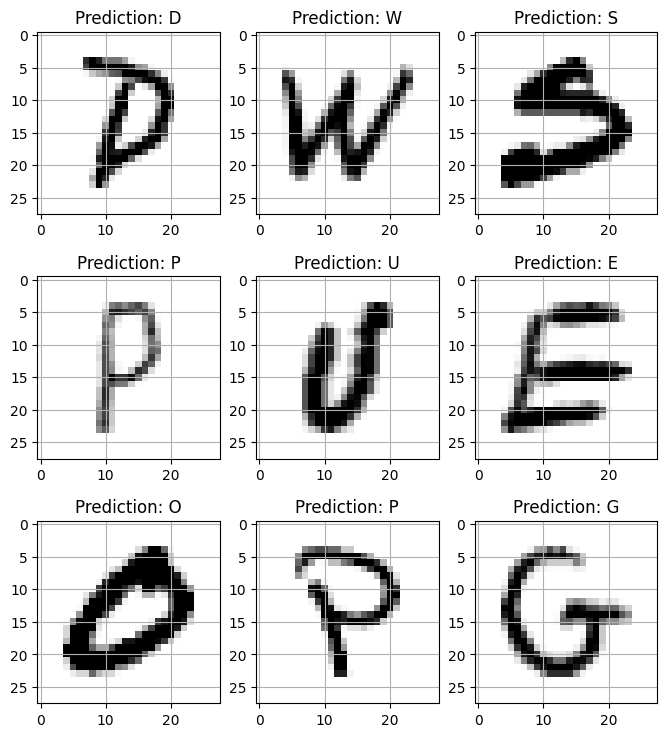

In [40]:
# Displaying some of the test images & their predicted labels...

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

1/1 [==============================] - 0s 109ms/step
Predicted character = A


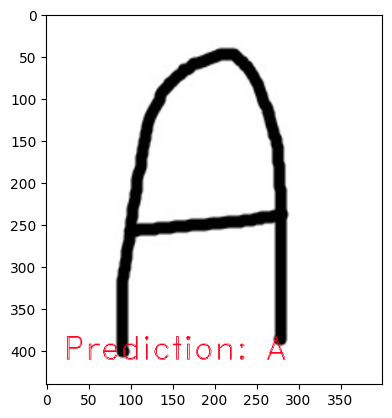

In [13]:
# Prediction on external image...

img = cv2.imread(r'My_A_2.jpg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final = np.reshape(img_final, (1,28,28,1))

img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))

print("Predicted character =", img_pred)
plt.imshow(img)
plt.show()

## Random Forest

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=150)

X = data.drop('0',axis=1)
y = data['0']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

RFC.fit(X_train, y_train)

ypred = RFC.predict(X_test)

print(RFC, ":", accuracy_score(y_test, ypred)*100)

RandomForestClassifier(n_estimators=150) : 98.24178864037621


## K-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
KNNmodel = KNeighborsClassifier(n_neighbors=1, weights='distance')
KNNmodel.fit(x_train, y_train)
y_pred = KNNmodel.predict(x_test)
print("The accuracy of model is :", accuracy_score(y_test, y_pred)*100)

The accuracy of model is : 98.60920928983757


## Image to Text

In [1]:
import pytesseract
from PIL import Image

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1141x445 at 0x1CB650E3D60>


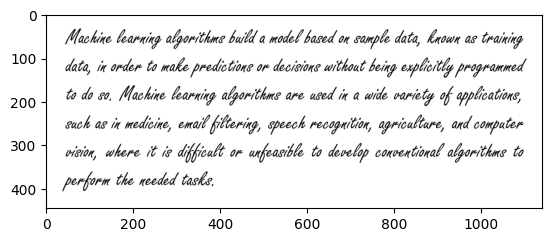

Machine learning abgorithns build a model based on sample date, known ae training
data, tn order to make predictions or decisions without being explicitly programmed
to do so, Machine learning algorithms are used in a wide variety of applications,

such as te medicine, email filtering, speech recagnition, agriculture, ard computer
vision, where It 19 difficult or anfeasible vo develop conventional algorithms co
perform the needed tacks,



In [19]:
img = Image.open('My_Text3.png')
print(img)
plt.imshow(img)
plt.show()

pytesseract.pytesseract.tesseract_cmd ='C:/Users/ishan/AppData/Local/Programs/Tesseract-OCR/tesseract.exe'
result = pytesseract.image_to_string(img)
# with open('abc.txt', mode ='w') as file:	
# 	file.write(result)
print(result)